In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
# Загрузка датасета MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Нормализация данных
train_images = train_images / 255.0
test_images = test_images / 255.0
# Преобразование меток в one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# Создание простой полносвязной модели
model1 = Sequential([
 Flatten(input_shape=(28, 28)),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')])
# Компиляция модели
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Обучение модели
model1.fit(train_images, train_labels, epochs=5)
# Проверка точности модели на обычных данных
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')
model1.save('mnist_model1.h5') # сохранение модели
# Создание модели свёрточной нейронной сети
model2 = Sequential([
 Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')])
# Компиляция модели
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Обучение модели
model2.fit(train_images, train_labels, epochs=5)
# Проверка точности модели на обычных данных
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')
model1.save('mnist_model2.h5') # сохранение модели

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8766 - loss: 0.4356
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9653 - loss: 0.1228
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9771 - loss: 0.0780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0580
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9875 - loss: 0.0435
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0857


Test accuracy on clean images: 0.9783999919891357


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9097 - loss: 0.2996
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9824 - loss: 0.0547
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9912 - loss: 0.0289
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9941 - loss: 0.0195
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9960 - loss: 0.0133
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9822 - loss: 0.0637


Test accuracy on clean images: 0.9842000007629395


In [13]:
import numpy as np
# Функция для реализации FGSM атаки
def fgsm_attack(image, epsilon, gradient):
  # Применение знака градиента к изображению
  perturbed_image = image + epsilon * np.sign(gradient)
  # Обрезка значений, чтобы они оставались в пределах [0,1]
  perturbed_image = np.clip(perturbed_image, 0, 1)
  return perturbed_image
# Вычисление градиента
def generate_adversarial_example(model, images, labels, epsilon):
    adversarial_images = []
    # Превращаем изображение в формат, подходящий для модели
    for i in range(len(images)):
      image = tf.convert_to_tensor(images[i].reshape((1, 28, 28, 1)))
      label = labels[i]
      # Если label — это one-hot вектор, преобразуем его в индекс
      if len(label.shape) > 1 and label.shape[1] > 1:
          label = np.argmax(label),
      label = tf.convert_to_tensor(label)
      with tf.GradientTape() as tape:
          tape.watch(image)
          prediction = model(image)
          loss = tf.keras.losses.categorical_crossentropy(label[None], prediction)
      gradient = tape.gradient(loss, image)
      # Применяем FGSM
      adversarial_image = fgsm_attack(image.numpy(), epsilon, gradient.numpy())
      adversarial_images.append(np.reshape(adversarial_image, (28, 28, 1)))
    return np.array(adversarial_images)
epsilon = 0.15 # Величина шума
# Создаём противоречивые изображения для простой полносвязной модели
adversarial_example = generate_adversarial_example(model1, test_images, test_labels, epsilon)

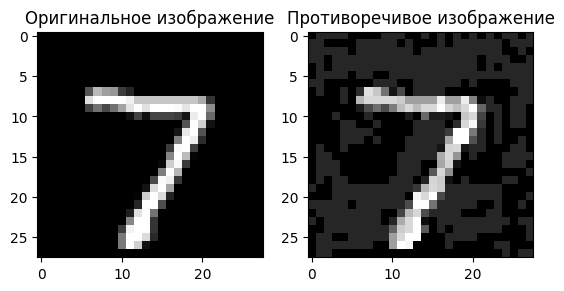

In [16]:
# Пример противоречивого изображения
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение")
plt.imshow(test_images[0], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение")
plt.imshow(adversarial_example[0].reshape(28, 28), cmap="gray")
plt.show()

In [23]:
# Оценка полносвязной модели на противоречивых примерах
adversarial_loss1, adversarial_acc1 = model1.evaluate(adversarial_example.reshape(10000, 28, 28),
test_labels)
# Оценка свёрточной модели на противоречивых примерах
adversarial_loss2, adversarial_acc2 = model2.evaluate(adversarial_example.reshape(10000, 28, 28),
test_labels)
print(f'Точность полносвязной модели: {adversarial_acc1}')
print(f'Точность свёрточной модели: {adversarial_acc2}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0251 - loss: 11.5024
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9157 - loss: 0.3007
Точность полносвязной модели: 0.03350000083446503
Точность свёрточной модели: 0.9229000210762024


Как можно заметить, атака не сильно повлияла на точность свёрточной модели, снизив её точность всего на ~6%. Следовательно, атака плохо переносится с полносвязной модели на свёрточную.

Проверим обратный переход

In [24]:
# Создаём противоречивые изображения для свёрточной модели
adversarial_example = generate_adversarial_example(model2, test_images, test_labels, epsilon)

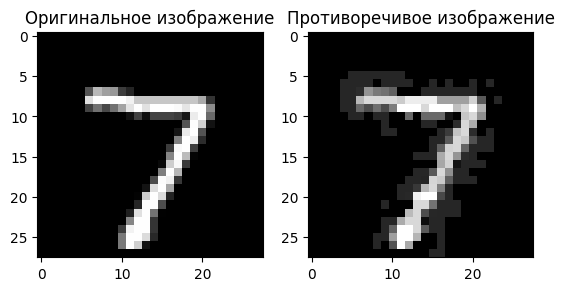

In [25]:
# Пример противоречивого изображения
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение")
plt.imshow(test_images[0], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение")
plt.imshow(adversarial_example[0].reshape(28, 28), cmap="gray")
plt.show()

Сразу видно разницу в помехах для разных моделей

In [26]:
# Оценка полносвязной модели на противоречивых примерах
adversarial_loss1, adversarial_acc1 = model1.evaluate(adversarial_example.reshape(10000, 28, 28),
test_labels)
# Оценка свёрточной модели на противоречивых примерах
adversarial_loss2, adversarial_acc2 = model2.evaluate(adversarial_example.reshape(10000, 28, 28),
test_labels)
print(f'Точность полносвязной модели: {adversarial_acc1}')
print(f'Точность свёрточной модели: {adversarial_acc2}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9406 - loss: 0.2000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3779 - loss: 3.0373
Точность полносвязной модели: 0.9463000297546387
Точность свёрточной модели: 0.3953999876976013


Ситуация ровно противоположная - теперь свёрточная модель предсказывает плохо, всего 40% точности, а на полносвязную атака повлияла слабо, понизив точность на ~3%

Вывод - атака FGSM между моделями переносится плохо